# Downloading and preparing the data

In [33]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [34]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

In [35]:
train_x, test_x = train_x / 255.0, test_x / 255.0 #changes pixel values between 0 and 1

# Improving the Basic Model

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), input_shape=(32,32,3)))#creates layers for a 2d array of pixels
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2))) #pooling helps detect features in an image, max pooling finds largest value
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64,(3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128,(3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))#regularisation of data
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_71 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)      



# Running, training, and evaluating data

In [ ]:
model.compile(optimizer='RMSprop',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
batch = 128
#create iterator - training data
it_train = datagen.flow(train_x, tf.squeeze(train_y), batch_size = batch) #batch_size default= 32

early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)

def scheduler(epoch, lr):
  if epoch < 70:
    return lr
  if epoch < 110:
    return lr * tf.math.exp(-0.3)
  else:
    return lr * tf.math.exp(-0.1)


learning_rate_scheduling = LearningRateScheduler(scheduler)

progress = model.fit(it_train, epochs=200, batch_size=batch, shuffle=True, callbacks=[early_stopping, learning_rate_scheduling], validation_data=(test_x, test_y))

Epoch 1/200
182/391 [============>.................] - ETA: 12s - loss: 0.4796 - accuracy: 0.8784

KeyboardInterrupt: ignored

In [ ]:
loss, acc = model.evaluate(test_x, test_y, verbose = 2)
print(acc)

313/313 - 1s - loss: 0.4094 - accuracy: 0.9077
0.9077000021934509


# Plotting Model Accuracy and Model Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


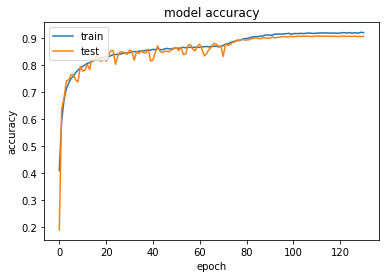

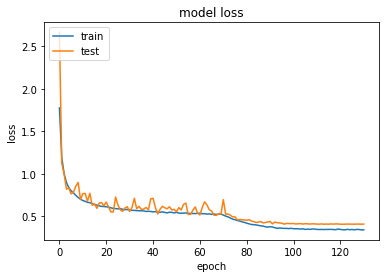

In [ ]:
print(progress.history.keys())
# summarize history for accuracy
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting the Model Architecture

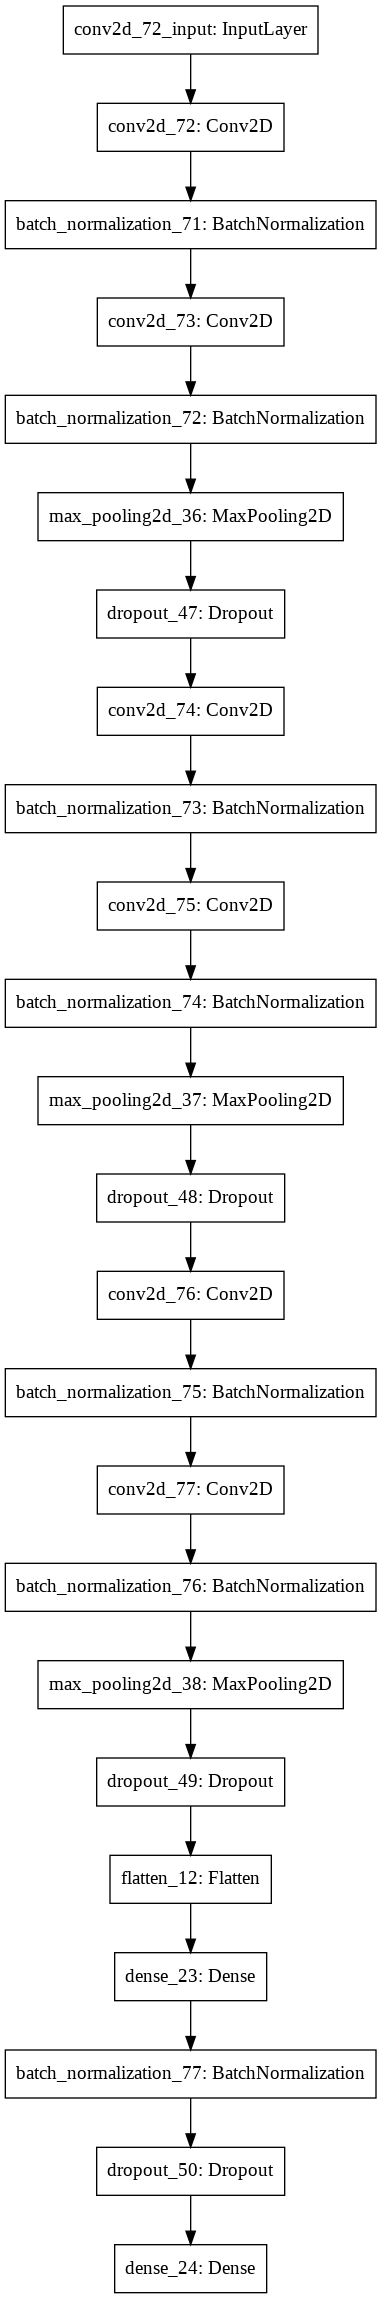

In [37]:
tf.keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

# Used websites

https://www.tensorflow.org/tutorials/images/cnn
https://www.tensorflow.org/addons/tutorials/layers_normalizations
https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
https://www.tensorflow.org/api_docs/python/tf/keras/Model



(source for data augmentation)

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/  
